In [33]:
import numpy as np
import matplotlib.pyplot as plt
import reading
from scipy.signal import butter, lfilter, freqz, firwin
from scipy.fft import fft, fftfreq

In [34]:
data_length = 4096 # d
timesteps = 2048
data_dim = data_length//timesteps # L
srate = 173.61

def reshape_signal(raw_signal):
    return reading.segment_data(raw_signal[0:data_length], timesteps, data_dim)


In [35]:
ubonn_data, ubonn_labels = reading.load_ubonn()
ubonn_data.shape

(500, 4097)

In [36]:
def gaussian_noise(length, strength = 1):
    return np.random.normal(0,1,length) * strength

In [37]:
raw = ubonn_data[0]
noisy = ubonn_data[0] + gaussian_noise(len(ubonn_data[0]), strength=20)


In [38]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def fir_bpf():
    firwin()


In [39]:
noise_20 = gaussian_noise(len(ubonn_data[0]), strength=100)
filtered_noise = butter_bandpass_filter(noise_20, 1, 3, srate)

noise_muscles = gaussian_noise(len(ubonn_data[0]), strength=100)
muscle_filtered = butter_bandpass_filter(noise_20, 20, 60, srate)


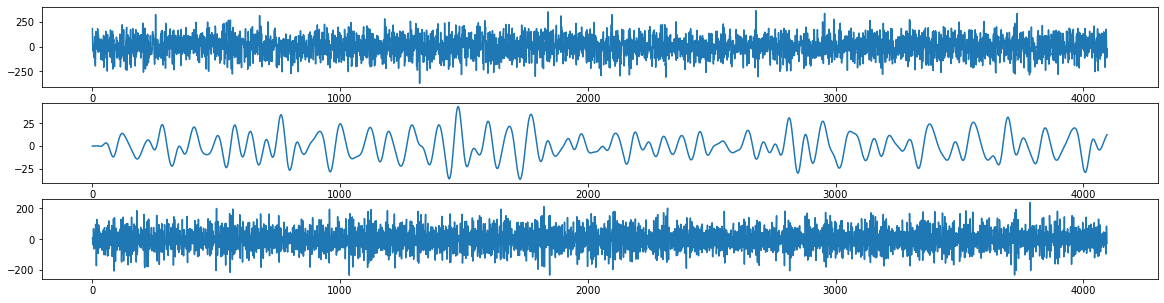

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20, 5))
ax1.plot(noise_20)
ax2.plot(filtered_noise)
ax3.plot(muscle_filtered)

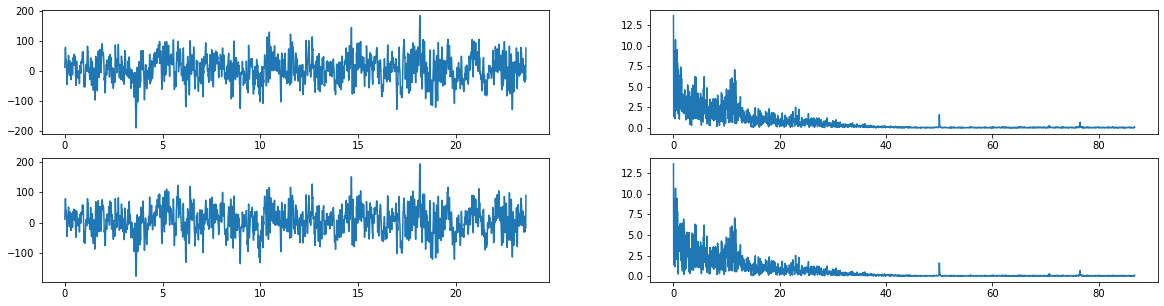

In [41]:

original = ubonn_data[0]
with_eyes = ubonn_data[0] + filtered_noise

original_fft = fft(original)
original_freqs = fftfreq(original.shape[0], 1/srate)

eyes_fft = fft(with_eyes)
eyes_freqs = fftfreq(with_eyes.shape[0], 1/srate)

t = np.linspace(0, data_length/srate, data_length + 1, endpoint=False)

fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 5))
ax11.plot(t, original, label='Raw signal')
ax12.plot(original_freqs[0:data_length//2], 2/data_length * np.abs(original_fft[0:data_length//2]))

ax21.plot(t, with_eyes, label='Noisy signal')
ax22.plot(eyes_freqs[0:data_length//2], 2/data_length * np.abs(eyes_fft[0:data_length//2]))
ax1.grid(True)
ax2.grid(True)
plt.show()

In [42]:
import random
def pos_generator(minw, maxw, maxp):
    start = 0
    end = 0
    while end < maxp:
        h = random.randint(minw, maxw)
        final = start + h
        end = final if final < maxp else maxp
        res = (start, end)
        start = end # + algo
        yield res

In [43]:
gen = pos_generator(2, 5, 10)
[n for n in gen]

[(0, 2), (2, 5), (5, 7), (7, 10)]

In [68]:
def pos_generator_2(min_window, max_window, min_blanc, max_blanc, max_pos, start=0):
    end = 0
    while end < max_pos:
        h = random.randint(min_window, max_window)
        final = start + h
        end = final if final < max_pos else max_pos
        res = (start, end)
        blanc = random.randint(min_blanc,max_blanc)
        start = end + blanc
        yield res

In [45]:
gen = pos_generator_2(2, 5,1,2, 10)
[n for n in gen]

[(0, 2), (3, 5), (6, 10)]

In [46]:
gen = pos_generator_2(17, 17*3, 173, 173 * 4, 4096)
[n for n in gen]

[(0, 33),
 (467, 504),
 (827, 847),
 (1120, 1152),
 (1516, 1561),
 (1823, 1840),
 (2043, 2084),
 (2639, 2686),
 (2977, 3023),
 (3432, 3449),
 (3776, 3799),
 (4158, 4096)]

In [49]:
filtered_noise.shape[0]

4097

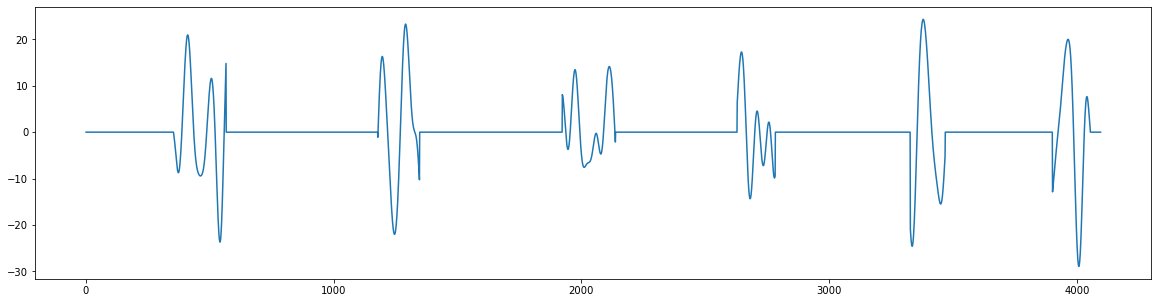

In [76]:
zeroes = np.zeros(filtered_noise.shape)

gen = pos_generator_2(17*7, 17*14, 173, 173*4, filtered_noise.shape[0]-1, start=-17)
for start, end in gen:
    zeroes[start:end] = filtered_noise[start:end]
plt.figure(figsize=(20, 5))
plt.plot(zeroes)